In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import statistics as st
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
import seaborn as sns
style.use('seaborn-dark-palette')
from scipy.stats import mstats

In [2]:
df = pd.read_csv(
    'fang_example.csv', 
    parse_dates = True, 
    index_col = 1, 
    na_values = ["", "C"]
)
df.head()

,PERMNO,TICKER,COMNAM,RET
date,,,,
2012-04-30,13407,NaN,NaN,NaN
2012-05-31,13407,FB,FACEBOOK INC,NaN
2012-06-29,13407,FB,FACEBOOK INC,0.050507
2012-07-31,13407,FB,FACEBOOK INC,-0.301817
2012-08-31,13407,FB,FACEBOOK INC,-0.168217


In [3]:
df2 = pd.pivot_table(
    df,
    index = "date",
    columns = "TICKER",
    values = "RET")
df2.head()

TICKER,AAPL,AMZN,BABA,FB,GOOG,GOOGL,NFLX
date,,,,,,,
2007-01-31,0.010490,-0.045362,NaN,NaN,0.089081,NaN,-0.117943
2007-02-28,-0.013064,0.039023,NaN,NaN,-0.103789,NaN,-0.012275
2007-03-30,0.098097,0.016607,NaN,NaN,0.019379,NaN,0.029294
2007-04-30,0.074158,0.541342,NaN,NaN,0.028855,NaN,-0.043984
2007-05-31,0.214339,0.127344,NaN,NaN,0.056279,NaN,-0.012183


In [4]:
dfmkt = pd.read_csv("mktindexes.csv", parse_dates = True, index_col = 0, na_values = [""])
dfmkt.head()

,vwretd,ewretd,sprtrn
DATE,,,
2007-01-31,0.019387,0.022283,0.014059
2007-02-28,-0.014006,0.002111,-0.021846
2007-03-30,0.012954,0.006545,0.009980
2007-04-30,0.039834,0.027048,0.043291
2007-05-31,0.038953,0.023123,0.032549


In [5]:
dftog = df2.join(dfmkt)
dftog.head()

,AAPL,AMZN,BABA,FB,GOOG,GOOGL,NFLX,vwretd,ewretd,sprtrn
date,,,,,,,,,,
2007-01-31,0.010490,-0.045362,NaN,NaN,0.089081,NaN,-0.117943,0.019387,0.022283,0.014059
2007-02-28,-0.013064,0.039023,NaN,NaN,-0.103789,NaN,-0.012275,-0.014006,0.002111,-0.021846
2007-03-30,0.098097,0.016607,NaN,NaN,0.019379,NaN,0.029294,0.012954,0.006545,0.009980
2007-04-30,0.074158,0.541342,NaN,NaN,0.028855,NaN,-0.043984,0.039834,0.027048,0.043291
2007-05-31,0.214339,0.127344,NaN,NaN,0.056279,NaN,-0.012183,0.038953,0.023123,0.032549


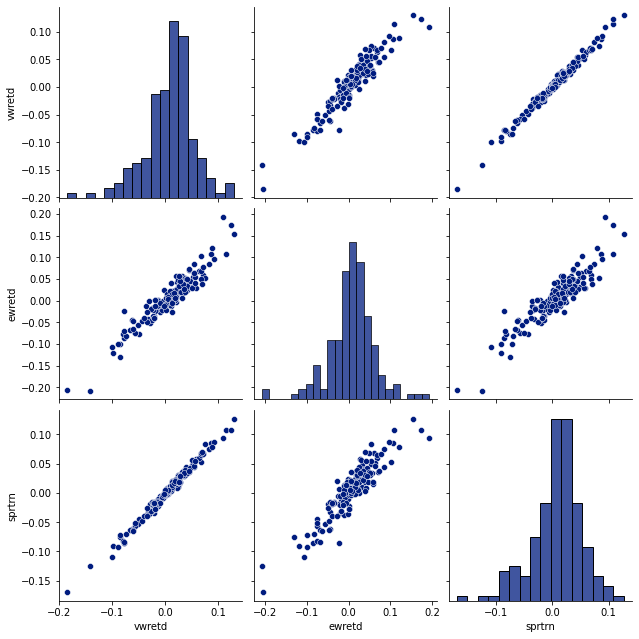

In [6]:
sns.pairplot(dfmkt,height=3)
plt.show()



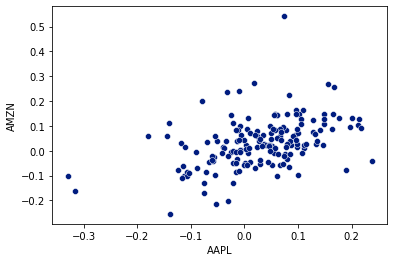

In [7]:
sns.scatterplot(x=dftog.iloc[:,0],y = dftog.iloc[:,1])
plt.show()

In [8]:
ticks=list(df2.columns.values)

In [9]:
ticks

['AAPL', 'AMZN', 'BABA', 'FB', 'GOOG', 'GOOGL', 'NFLX']

In [10]:
print("Choose one of the following tickers: ")
print('[%s]' % ','.join(map(str,ticks)))
tick = input()
tick = tick.upper()

Choose one of the following tickers: 
[AAPL,AMZN,BABA,FB,GOOG,GOOGL,NFLX]
AAPL


In [11]:
inds=list(dfmkt.columns.values)
print("Choose one of the following indexes: ")
print('[%s]' % ','.join(map(str,inds)))
indsel = input()
indsel = indsel.lower()

Choose one of the following indexes: 
[vwretd,ewretd,sprtrn]
sprtrn


In [12]:
dftog["Selected"] = dftog[tick].tolist()
dftog["Selected_index"] = dftog[indsel].tolist()

Text(0, 0.5, 'AAPL')

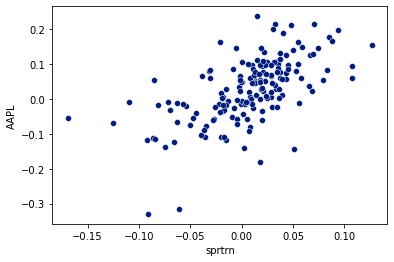

In [13]:
sns.scatterplot(x=dftog.Selected_index, y = dftog.Selected)
plt.xlabel(indsel)
plt.ylabel(tick)

In [14]:
import statsmodels.formula.api as smf
formula = 'Selected ~ Selected_index'
results = smf.ols(formula, dftog).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Selected   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     93.67
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           7.58e-18
Time:                        15:14:33   Log-Likelihood:                 202.01
No. Observations:                 168   AIC:                            -400.0
Df Residuals:                     166   BIC:                            -393.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0195      0.006      3.425      0.001       0.008       0.031
Selected_index     1.2176      0.126      9.678      0.000       0.969       1.466
==============================================================================
Omnibus:                       14.724   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.708
Skew:                          -0.467   Prob(JB):                     7.11e-06
Kurtosis:                       4.586   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
from pandas_datareader import wb

df1 = wb.download(indicator = 'IC.TAX.TOTL.CP.ZS', \
                  country = ['US','CA','MX','GB'], start = 2000, end = 2021)
df1.head()

IC.TAX.TOTL.CP.ZS
country year                   
Canada  2020                NaN
        2019               24.5
        2018               20.5
        2017               20.9
        2016               21.0

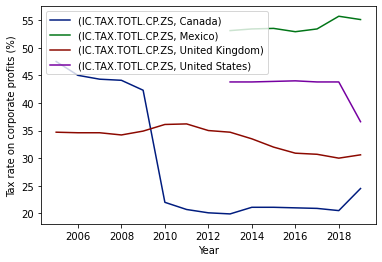

In [17]:
dfu = df1.unstack(level=0)

dfu.plot()
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Tax rate on corporate profits (%)")
plt.show()

In [18]:
mean_tax = df1['IC.TAX.TOTL.CP.ZS'].groupby(level = 0).mean()
mean_tax

country
Canada            29.000000
Mexico            53.871429
United Kingdom    33.513333
United States     42.814286
Name: IC.TAX.TOTL.CP.ZS, dtype: float64

In [20]:
ind = ['NY.GDP.PCAP.CD', 'IT.CEL.SETS.P2', 'FB.ATM.TOTL.P5', 'IT.NET.USER.ZS']
df2 = wb.download(indicator = ind, country = 'all', start = 2000, end = 2020).dropna()
df2.head()

NY.GDP.PCAP.CD  IT.CEL.SETS.P2  FB.ATM.TOTL.P5  \
country    year                                                   
Arab World 2019     6584.740241       99.571493          27.355   
           2018     6601.825189      100.281536          28.615   
           2017     6108.588220      101.030786          27.360   
           2016     6112.105953      103.190803          26.780   
           2015     6400.360350      105.734759          24.120   

                 IT.NET.USER.ZS  
country    year                  
Arab World 2019       55.798372  
           2018       52.128085  
           2017       49.260132  
           2016       41.487480  
           2015       43.696336

In [ ]:
df2.columns = ['GDP','Mobile','ATM','Internet']
model =ols(formula = 'GDP~Mobile + ATM + Internet', data = df2)
res=model.fit()
res.summary()